<a href="https://colab.research.google.com/github/Kavya2099/mlbookcamp/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-04 05:30:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-04 05:30:21 (5.69 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df= pd.read_csv('AER_credit_card_data.csv')

df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
df.card.value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [4]:
df.card = (df.card=='yes').astype('int')
df.tail()
df.card.value_counts()

1    1023
0     296
Name: card, dtype: int64

In [5]:
X= df.drop(['card'],axis=1)
y= df.card

from sklearn.model_selection import train_test_split

def split(X,y):


  full_X_train, X_val, full_y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=1)
  X_train, X_test, y_train , y_test = train_test_split(full_X_train,full_y_train,test_size=0.25, random_state=1)
  return (X_train, X_val, y_train , y_val)

Question 1

In [6]:
from sklearn.metrics import roc_auc_score
X_train, X_val, y_train , y_val= split(X,y)
roc_auc_score(y_train, X_train['reports'])

0.28333701393106236

In [7]:
roc_auc_score(y_train, X_train['dependents'])

0.46722427722262094

In [8]:
roc_auc_score(y_train, X_train['active'])

0.6043173411362006

In [9]:
roc_auc_score(y_train, X_train['share'])

0.989183643423692

share has high AUC score

Question 2

In [10]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import OneHotEncoder


 

In [11]:
from sklearn.metrics import accuracy_score

X= df.drop(['card'],axis=1)
y= df.card
X = OneHotEncoder().fit_transform(X)
X_train, X_val, y_train , y_val = split(X,y)
print('logistic regression')
model1= LogisticRegression(max_iter=100)
model1.fit(X_train, y_train)
pred = model1.predict(X_val)

  
print('ACCURACY: ',accuracy_score(pred,y_val)*100)

logistic regression
ACCURACY:  98.86363636363636


In [12]:
print("AUC: ", round(roc_auc_score(y_val, pred),3))

AUC:  0.992


0.995 is the closest answer

Question 3

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.98      0.99       198

    accuracy                           0.99       264
   macro avg       0.98      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264



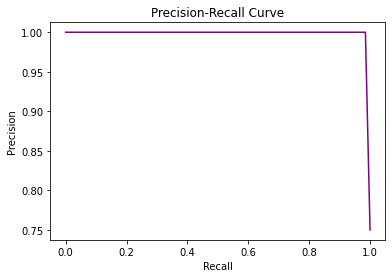

In [14]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [17]:
def confusion_matrix_dataframe(y_val, pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (pred >= t)
        predict_negative = (pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [19]:
df_scores = confusion_matrix_dataframe(y_val, pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,198,66,0,0
10,0.1,195,0,3,66
20,0.2,195,0,3,66
30,0.3,195,0,3,66
40,0.4,195,0,3,66
50,0.5,195,0,3,66
60,0.6,195,0,3,66
70,0.7,195,0,3,66
80,0.8,195,0,3,66
90,0.9,195,0,3,66


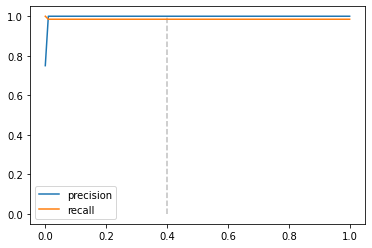

In [20]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.4, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

They both interact at 0.1

Question 4

In [15]:
from sklearn.metrics import f1_score

a=f1_score(y_val, pred)
a

0.9923664122137404

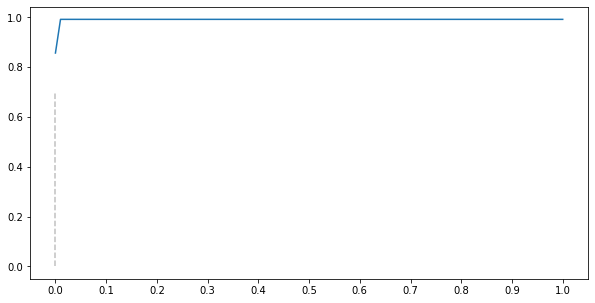

In [23]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0, 0, 0.7, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

Curve is at maximum from 0.1

Question 5

In [41]:
from sklearn.pipeline import Pipeline

X= df.drop(['card'],axis=1)
y= df.card
X = OneHotEncoder().fit_transform(X)
#X_train, X_val, y_train , y_val = split(X,y)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [46]:
from sklearn.model_selection import cross_val_score

k_scores=[]

score = cross_val_score(model,X,y,cv=5,scoring='roc_auc')
k_scores.append(score)
print(score)



[0.99768499 0.99760232 0.99578338 0.99305556 0.99401795]


In [49]:
print('%.3f +- %.3f' % (np.mean(k_scores), np.std(k_scores)))

0.996 +- 0.002


In [54]:
print('{:.3f} +- {:.3f}' .format(np.mean(k_scores), np.std(k_scores)))

0.996 +- 0.002


Closest is 0.003

Question 6

In [63]:
from sklearn.pipeline import Pipeline

X= df.drop(['card'],axis=1)
y= df.card
X = OneHotEncoder().fit_transform(X)
#X_train, X_val, y_train , y_val = split(X,y)




c=[0.01, 0.1, 1, 10]
for i in c:
  k1_scores=[]
  model = LogisticRegression(solver='liblinear', C=i, max_iter=1000)
  score = cross_val_score(model,X,y,cv=5,scoring='roc_auc')
  k1_scores.append(score)
  print('C=%4s  %.3f +- %.3f' % (i, np.mean(k1_scores), np.std(k1_scores)))

C=0.01  0.996 +- 0.002
C= 0.1  0.997 +- 0.002
C=   1  0.996 +- 0.002
C=  10  0.994 +- 0.003



C= 0.1  0.997 +- 0.002 ---> gives best mean score